In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [74]:
df = pd.read_csv('collated.csv')

In [75]:
df

,File,ConfigId,Result,RuntimeSec,Count
0,max2-exp.sl,Bottom-up (raw),sat,0.004700,1363
1,max2-exp.sl,Bottom-up (OE),sat,0.044300,307
2,max2-exp.sl,Top-down (raw),sat,0.052300,2742
3,max2-exp.sl,Top-down (intervals),sat,0.059898,1170
4,regex4-simple.sl,Bottom-up (raw),sat,1.581000,261791
5,regex4-simple.sl,Bottom-up (OE),sat,1.706900,15374
6,regex4-simple.sl,Top-down (raw),sat,2.241000,221631
7,regex4-simple.sl,Top-down (intervals),sat,3.360873,79511
8,max3-exp.sl,Bottom-up (OE),sat,1.736400,41680
9,max3-exp.sl,Top-down (intervals),sat,52.751919,3533567


In [76]:
df = df[np.equal(df.Result,'sat')]
df['LogTenCount'] = np.log10(df.Count)

C:\Users\Wiley\AppData\Local\Temp/ipykernel_24712/4237833498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LogTenCount'] = np.log10(df.Count)


In [77]:
distinct_configs = [k for k in np.unique(df.ConfigId)]
config_map = dict()
config_map_inv = dict()
for i in range(len(ids)):
    config_map[distinct_configs[i]] = i
    config_map_inv[i] = distinct_configs[i]
    
df['ConfigIdx'] = [config_map[a] for a in df.ConfigId]

C:\Users\Wiley\AppData\Local\Temp/ipykernel_24712/1281722720.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfigIdx'] = [config_map[a] for a in df.ConfigId]


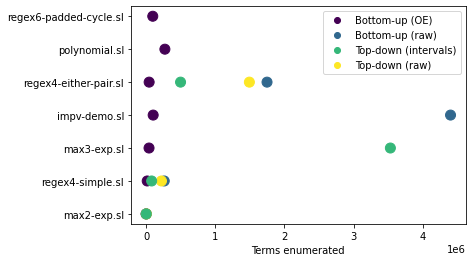

In [99]:
(fig,ax) = plt.subplots()

scatter = ax.scatter(y=df.File,x=df.Count,s=100,c=[config_map[k] for k in df.ConfigId])

rr = scatter.legend_elements()
rr = (rr[0],  [config_map_inv[i] for i in range(len(rr[1]))])

ax.set_xlabel("Terms enumerated")

ax.legend(*rr)

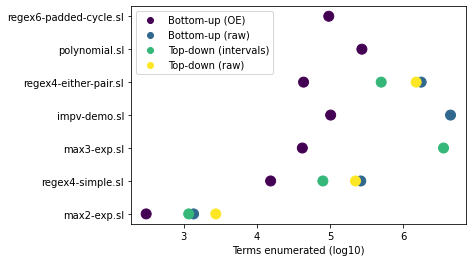

In [100]:
(fig,ax) = plt.subplots()

scatter = ax.scatter(y=df.File,x=df.LogTenCount,s=100,c=[config_map[k] for k in df.ConfigId])

rr = scatter.legend_elements()
rr = (rr[0],  [config_map_inv[i] for i in range(len(rr[1]))])

ax.set_xlabel('Terms enumerated (log10)')

ax.legend(*rr)

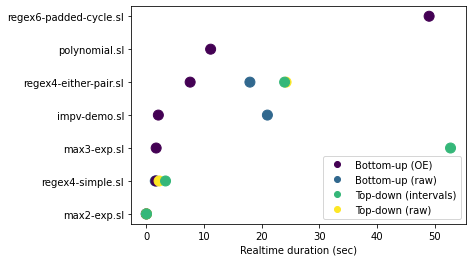

In [101]:
(fig,ax) = plt.subplots()

scatter = ax.scatter(y=df.File,x=df.RuntimeSec,s=100,c=[config_map[k] for k in df.ConfigId])

rr = scatter.legend_elements()
rr = (rr[0],  [config_map_inv[i] for i in range(len(rr[1]))])
ax.set_xlabel('Realtime duration (sec)')
ax.legend(*rr)

In [87]:
etc = df[np.isin(df.ConfigId, ['Top-down (raw)','Top-down (intervals)'])]

In [89]:
rdf = pd.read_csv("ratios.csv")

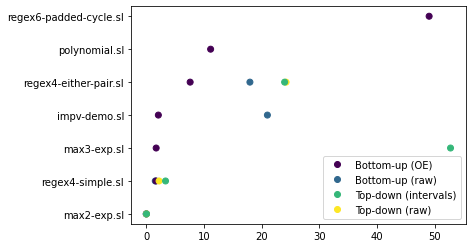

In [98]:
(fig,ax) = plt.subplots()



scatter = ax.scatter(y=df.File,x=df.RuntimeSec,c=[config_map[k] for k in df.ConfigId])

rr = scatter.legend_elements()
rr = (rr[0],  [config_map_inv[i] for i in range(len(rr[1]))])

ax.legend(*rr)